In [1]:
import keras
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
dados=load_iris()

In [3]:
#dados

In [4]:
dadosx=pd.DataFrame(dados.data, columns=dados.feature_names)

In [5]:
dadosx

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
dadosx.shape

(150, 4)

In [7]:
dadosy=pd.Series(dados.target)

In [8]:
#dadosy

In [9]:
from keras.utils import np_utils
#dadosyconvert=pd.get_dummies(dadosy, columns=dados.target_names)
dadosyconvert=np_utils.to_categorical(dadosy)

In [10]:
dadosyconvert

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [11]:
type(dadosyconvert)

numpy.ndarray

In [12]:
dadosyconvert=pd.DataFrame(dadosyconvert)

In [13]:
type(dadosyconvert)

pandas.core.frame.DataFrame

In [14]:
dadosyconvert.rename(columns={dadosyconvert.columns[0]: 'setosa'}, inplace=True)
dadosyconvert.rename(columns={dadosyconvert.columns[1]: 'versicolor'}, inplace=True)
dadosyconvert.rename(columns={dadosyconvert.columns[2]: 'virginica'}, inplace=True)

In [15]:
dadosyconvert

,setosa,versicolor,virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
145,0.0,0.0,1.0
146,0.0,0.0,1.0
147,0.0,0.0,1.0
148,0.0,0.0,1.0


In [16]:
from sklearn.model_selection import train_test_split
xtreino, xteste, ytreino, yteste = train_test_split(dadosx,dadosyconvert, test_size=0.3)

In [17]:
xtreino

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
47,4.6,3.2,1.4,0.2
73,6.1,2.8,4.7,1.2
22,4.6,3.6,1.0,0.2
4,5.0,3.6,1.4,0.2
57,4.9,2.4,3.3,1.0
...,...,...,...,...
105,7.6,3.0,6.6,2.1
104,6.5,3.0,5.8,2.2
28,5.2,3.4,1.4,0.2
88,5.6,3.0,4.1,1.3


In [18]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [19]:
#Criaçao da rede neural
modelo=Sequential()
modelo.add(Dense(10, input_dim=4, kernel_initializer='normal',activation='relu')) #Primeira camada oculta e entrada
modelo.add(Dense(3, kernel_initializer='normal',activation='softmax')) #saida

In [20]:
otimiza=SGD() #Utilização do Gradiente Descendente Estocastico

In [21]:
modelo.compile(loss='categorical_crossentropy',optimizer=otimiza, metrics=['acc'])
#Definiçao da funcao de custo (loss), utilizaçao do otimizador SGD e metrica da acuracia (acc)

In [22]:
historico=modelo.fit(xtreino, ytreino, epochs=1000, batch_size=105, validation_data=(xteste,yteste), verbose=1)

Epoch 1/1000
1/1 [==============================] - 0s 464ms/step - loss: 1.1058 - acc: 0.3524 - val_loss: 1.1134 - val_acc: 0.2889
Epoch 2/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.1055 - acc: 0.3524 - val_loss: 1.1129 - val_acc: 0.2889
Epoch 3/1000
1/1 [==============================] - 0s 24ms/step - loss: 1.1052 - acc: 0.3524 - val_loss: 1.1123 - val_acc: 0.2889
Epoch 4/1000
1/1 [==============================] - 0s 24ms/step - loss: 1.1049 - acc: 0.3524 - val_loss: 1.1118 - val_acc: 0.2889
Epoch 5/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.1045 - acc: 0.3524 - val_loss: 1.1114 - val_acc: 0.2889
Epoch 6/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.1042 - acc: 0.3524 - val_loss: 1.1109 - val_acc: 0.2889
Epoch 7/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.1039 - acc: 0.3524 - val_loss: 1.1104 - val_acc: 0.2889
Epoch 8/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.1036 - 

1/1 [==============================] - 0s 24ms/step - loss: 1.0898 - acc: 0.3429 - val_loss: 1.0902 - val_acc: 0.3333
Epoch 64/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.0895 - acc: 0.3429 - val_loss: 1.0899 - val_acc: 0.3333
Epoch 65/1000
1/1 [==============================] - 0s 23ms/step - loss: 1.0893 - acc: 0.3429 - val_loss: 1.0895 - val_acc: 0.3333
Epoch 66/1000
1/1 [==============================] - 0s 21ms/step - loss: 1.0890 - acc: 0.3429 - val_loss: 1.0892 - val_acc: 0.3333
Epoch 67/1000
1/1 [==============================] - 0s 23ms/step - loss: 1.0887 - acc: 0.3429 - val_loss: 1.0888 - val_acc: 0.3333
Epoch 68/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.0884 - acc: 0.3429 - val_loss: 1.0884 - val_acc: 0.3333
Epoch 69/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.0881 - acc: 0.3429 - val_loss: 1.0881 - val_acc: 0.3333
Epoch 70/1000
1/1 [==============================] - 0s 24ms/step - loss: 1.0879 - acc: 0.

Epoch 125/1000
1/1 [==============================] - 0s 24ms/step - loss: 1.0652 - acc: 0.4762 - val_loss: 1.0606 - val_acc: 0.5111
Epoch 126/1000
1/1 [==============================] - 0s 24ms/step - loss: 1.0646 - acc: 0.4762 - val_loss: 1.0599 - val_acc: 0.5111
Epoch 127/1000
1/1 [==============================] - 0s 24ms/step - loss: 1.0640 - acc: 0.5048 - val_loss: 1.0592 - val_acc: 0.5111
Epoch 128/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.0634 - acc: 0.5048 - val_loss: 1.0586 - val_acc: 0.5111
Epoch 129/1000
1/1 [==============================] - 0s 23ms/step - loss: 1.0628 - acc: 0.5048 - val_loss: 1.0579 - val_acc: 0.5111
Epoch 130/1000
1/1 [==============================] - 0s 24ms/step - loss: 1.0622 - acc: 0.5048 - val_loss: 1.0572 - val_acc: 0.5111
Epoch 131/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.0616 - acc: 0.5333 - val_loss: 1.0565 - val_acc: 0.5111
Epoch 132/1000
1/1 [==============================] - 0s 24ms/step - 

1/1 [==============================] - 0s 23ms/step - loss: 1.0131 - acc: 0.6667 - val_loss: 1.0047 - val_acc: 0.6667
Epoch 187/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.0119 - acc: 0.6667 - val_loss: 1.0035 - val_acc: 0.6667
Epoch 188/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.0107 - acc: 0.6667 - val_loss: 1.0023 - val_acc: 0.6667
Epoch 189/1000
1/1 [==============================] - 0s 23ms/step - loss: 1.0095 - acc: 0.6667 - val_loss: 1.0011 - val_acc: 0.6667
Epoch 190/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.0082 - acc: 0.6667 - val_loss: 0.9999 - val_acc: 0.6667
Epoch 191/1000
1/1 [==============================] - 0s 23ms/step - loss: 1.0070 - acc: 0.6667 - val_loss: 0.9986 - val_acc: 0.6667
Epoch 192/1000
1/1 [==============================] - 0s 24ms/step - loss: 1.0058 - acc: 0.6667 - val_loss: 0.9974 - val_acc: 0.6667
Epoch 193/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.0045 - 

Epoch 248/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.9135 - acc: 0.6667 - val_loss: 0.9093 - val_acc: 0.6667
Epoch 249/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.9115 - acc: 0.6667 - val_loss: 0.9074 - val_acc: 0.6667
Epoch 250/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.9094 - acc: 0.6667 - val_loss: 0.9055 - val_acc: 0.6667
Epoch 251/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.9073 - acc: 0.6667 - val_loss: 0.9036 - val_acc: 0.6667
Epoch 252/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.9052 - acc: 0.6667 - val_loss: 0.9017 - val_acc: 0.6667
Epoch 253/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.9031 - acc: 0.6667 - val_loss: 0.8998 - val_acc: 0.6667
Epoch 254/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.9010 - acc: 0.6667 - val_loss: 0.8978 - val_acc: 0.6667
Epoch 255/1000
1/1 [==============================] - 0s 26ms/step - 

1/1 [==============================] - 0s 24ms/step - loss: 0.7772 - acc: 0.6667 - val_loss: 0.7814 - val_acc: 0.6667
Epoch 310/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.7749 - acc: 0.6667 - val_loss: 0.7793 - val_acc: 0.6667
Epoch 311/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.7727 - acc: 0.6667 - val_loss: 0.7772 - val_acc: 0.6667
Epoch 312/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.7705 - acc: 0.6667 - val_loss: 0.7752 - val_acc: 0.6667
Epoch 313/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.7683 - acc: 0.6667 - val_loss: 0.7731 - val_acc: 0.6667
Epoch 314/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.7660 - acc: 0.6667 - val_loss: 0.7710 - val_acc: 0.6667
Epoch 315/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.7638 - acc: 0.6667 - val_loss: 0.7690 - val_acc: 0.6667
Epoch 316/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.7616 - 

Epoch 371/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.6500 - acc: 0.6667 - val_loss: 0.6647 - val_acc: 0.6889
Epoch 372/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.6482 - acc: 0.6667 - val_loss: 0.6630 - val_acc: 0.6889
Epoch 373/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.6464 - acc: 0.6667 - val_loss: 0.6614 - val_acc: 0.6889
Epoch 374/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.6446 - acc: 0.6667 - val_loss: 0.6598 - val_acc: 0.6889
Epoch 375/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.6429 - acc: 0.6667 - val_loss: 0.6583 - val_acc: 0.6889
Epoch 376/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.6412 - acc: 0.6667 - val_loss: 0.6567 - val_acc: 0.6889
Epoch 377/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.6394 - acc: 0.6667 - val_loss: 0.6551 - val_acc: 0.6889
Epoch 378/1000
1/1 [==============================] - 0s 26ms/step - 

1/1 [==============================] - 0s 26ms/step - loss: 0.5599 - acc: 0.6952 - val_loss: 0.5826 - val_acc: 0.7111
Epoch 433/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.5587 - acc: 0.6952 - val_loss: 0.5815 - val_acc: 0.7111
Epoch 434/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.5575 - acc: 0.6952 - val_loss: 0.5804 - val_acc: 0.7111
Epoch 435/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.5564 - acc: 0.6952 - val_loss: 0.5793 - val_acc: 0.7111
Epoch 436/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.5552 - acc: 0.6952 - val_loss: 0.5782 - val_acc: 0.7111
Epoch 437/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.5540 - acc: 0.6952 - val_loss: 0.5772 - val_acc: 0.7111
Epoch 438/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.5529 - acc: 0.6952 - val_loss: 0.5761 - val_acc: 0.7111
Epoch 439/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.5518 - 

Epoch 494/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.4995 - acc: 0.8095 - val_loss: 0.5262 - val_acc: 0.8222
Epoch 495/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.4987 - acc: 0.8190 - val_loss: 0.5255 - val_acc: 0.8222
Epoch 496/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.4979 - acc: 0.8190 - val_loss: 0.5247 - val_acc: 0.8222
Epoch 497/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.4971 - acc: 0.8190 - val_loss: 0.5240 - val_acc: 0.8222
Epoch 498/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.4963 - acc: 0.8190 - val_loss: 0.5233 - val_acc: 0.8444
Epoch 499/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.4956 - acc: 0.8190 - val_loss: 0.5225 - val_acc: 0.8444
Epoch 500/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.4948 - acc: 0.8190 - val_loss: 0.5218 - val_acc: 0.8444
Epoch 501/1000
1/1 [==============================] - 0s 26ms/step - 

1/1 [==============================] - 0s 26ms/step - loss: 0.4576 - acc: 0.8762 - val_loss: 0.4862 - val_acc: 0.8889
Epoch 556/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.4570 - acc: 0.8762 - val_loss: 0.4856 - val_acc: 0.8889
Epoch 557/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.4564 - acc: 0.8762 - val_loss: 0.4850 - val_acc: 0.8889
Epoch 558/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.4558 - acc: 0.8762 - val_loss: 0.4844 - val_acc: 0.8889
Epoch 559/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.4552 - acc: 0.8762 - val_loss: 0.4839 - val_acc: 0.8889
Epoch 560/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.4547 - acc: 0.8762 - val_loss: 0.4833 - val_acc: 0.8889
Epoch 561/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.4541 - acc: 0.8857 - val_loss: 0.4827 - val_acc: 0.8889
Epoch 562/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.4535 - 

Epoch 617/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.4242 - acc: 0.9143 - val_loss: 0.4535 - val_acc: 0.9111
Epoch 618/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.4238 - acc: 0.9143 - val_loss: 0.4530 - val_acc: 0.9111
Epoch 619/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.4233 - acc: 0.9143 - val_loss: 0.4525 - val_acc: 0.9111
Epoch 620/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.4228 - acc: 0.9238 - val_loss: 0.4520 - val_acc: 0.9111
Epoch 621/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.4223 - acc: 0.9238 - val_loss: 0.4515 - val_acc: 0.9111
Epoch 622/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.4218 - acc: 0.9238 - val_loss: 0.4510 - val_acc: 0.9111
Epoch 623/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.4213 - acc: 0.9238 - val_loss: 0.4506 - val_acc: 0.9111
Epoch 624/1000
1/1 [==============================] - 0s 25ms/step - 

1/1 [==============================] - 0s 23ms/step - loss: 0.3962 - acc: 0.9619 - val_loss: 0.4255 - val_acc: 0.9333
Epoch 679/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.3957 - acc: 0.9619 - val_loss: 0.4250 - val_acc: 0.9333
Epoch 680/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.3953 - acc: 0.9619 - val_loss: 0.4246 - val_acc: 0.9333
Epoch 681/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.3949 - acc: 0.9619 - val_loss: 0.4242 - val_acc: 0.9333
Epoch 682/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.3944 - acc: 0.9619 - val_loss: 0.4237 - val_acc: 0.9333
Epoch 683/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.3940 - acc: 0.9619 - val_loss: 0.4233 - val_acc: 0.9333
Epoch 684/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.3936 - acc: 0.9619 - val_loss: 0.4229 - val_acc: 0.9333
Epoch 685/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.3931 - 

Epoch 740/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.3703 - acc: 0.9810 - val_loss: 0.3994 - val_acc: 0.9333
Epoch 741/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.3699 - acc: 0.9810 - val_loss: 0.3989 - val_acc: 0.9333
Epoch 742/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.3695 - acc: 0.9810 - val_loss: 0.3985 - val_acc: 0.9333
Epoch 743/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.3691 - acc: 0.9810 - val_loss: 0.3981 - val_acc: 0.9333
Epoch 744/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.3688 - acc: 0.9810 - val_loss: 0.3977 - val_acc: 0.9333
Epoch 745/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.3684 - acc: 0.9810 - val_loss: 0.3973 - val_acc: 0.9333
Epoch 746/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.3680 - acc: 0.9810 - val_loss: 0.3969 - val_acc: 0.9333
Epoch 747/1000
1/1 [==============================] - 0s 25ms/step - 

1/1 [==============================] - 0s 25ms/step - loss: 0.3467 - acc: 0.9810 - val_loss: 0.3752 - val_acc: 0.9556
Epoch 802/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.3463 - acc: 0.9810 - val_loss: 0.3748 - val_acc: 0.9556
Epoch 803/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.3459 - acc: 0.9810 - val_loss: 0.3744 - val_acc: 0.9556
Epoch 804/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.3456 - acc: 0.9810 - val_loss: 0.3740 - val_acc: 0.9556
Epoch 805/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.3452 - acc: 0.9810 - val_loss: 0.3737 - val_acc: 0.9556
Epoch 806/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.3448 - acc: 0.9810 - val_loss: 0.3733 - val_acc: 0.9556
Epoch 807/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.3444 - acc: 0.9810 - val_loss: 0.3729 - val_acc: 0.9556
Epoch 808/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.3441 - 

Epoch 863/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.3240 - acc: 0.9810 - val_loss: 0.3520 - val_acc: 0.9778
Epoch 864/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.3237 - acc: 0.9810 - val_loss: 0.3516 - val_acc: 0.9778
Epoch 865/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.3233 - acc: 0.9810 - val_loss: 0.3512 - val_acc: 0.9778
Epoch 866/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.3229 - acc: 0.9810 - val_loss: 0.3509 - val_acc: 0.9778
Epoch 867/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.3226 - acc: 0.9810 - val_loss: 0.3505 - val_acc: 0.9778
Epoch 868/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.3222 - acc: 0.9810 - val_loss: 0.3501 - val_acc: 0.9778
Epoch 869/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.3219 - acc: 0.9810 - val_loss: 0.3498 - val_acc: 0.9778
Epoch 870/1000
1/1 [==============================] - 0s 24ms/step - 

1/1 [==============================] - 0s 24ms/step - loss: 0.3030 - acc: 0.9810 - val_loss: 0.3303 - val_acc: 0.9778
Epoch 925/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.3027 - acc: 0.9810 - val_loss: 0.3300 - val_acc: 0.9778
Epoch 926/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.3023 - acc: 0.9810 - val_loss: 0.3296 - val_acc: 0.9778
Epoch 927/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.3020 - acc: 0.9810 - val_loss: 0.3293 - val_acc: 0.9778
Epoch 928/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.3017 - acc: 0.9810 - val_loss: 0.3289 - val_acc: 0.9778
Epoch 929/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.3013 - acc: 0.9810 - val_loss: 0.3286 - val_acc: 0.9778
Epoch 930/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.3010 - acc: 0.9810 - val_loss: 0.3282 - val_acc: 0.9778
Epoch 931/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.3007 - 

Epoch 986/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2830 - acc: 0.9810 - val_loss: 0.3097 - val_acc: 0.9778
Epoch 987/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.2827 - acc: 0.9810 - val_loss: 0.3094 - val_acc: 0.9778
Epoch 988/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.2824 - acc: 0.9810 - val_loss: 0.3090 - val_acc: 0.9778
Epoch 989/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.2821 - acc: 0.9810 - val_loss: 0.3087 - val_acc: 0.9778
Epoch 990/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2818 - acc: 0.9810 - val_loss: 0.3084 - val_acc: 0.9778
Epoch 991/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.2815 - acc: 0.9810 - val_loss: 0.3081 - val_acc: 0.9778
Epoch 992/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.2812 - acc: 0.9810 - val_loss: 0.3078 - val_acc: 0.9778
Epoch 993/1000
1/1 [==============================] - 0s 26ms/step - 

In [23]:
predicoes=modelo.predict(xteste)

2/2 [==============================] - 0s 2ms/step


In [24]:
predicoes

array([[3.42516112e-04, 2.50745833e-01, 7.48911738e-01],
       [6.73080608e-03, 5.41538179e-01, 4.51731086e-01],
       [1.42827758e-03, 3.35949898e-01, 6.62621796e-01],
       [9.73049700e-01, 2.68478841e-02, 1.02472404e-04],
       [9.48826253e-01, 5.07844761e-02, 3.89317080e-04],
       [1.07758713e-03, 2.65522689e-01, 7.33399689e-01],
       [5.71467914e-03, 4.75115240e-01, 5.19170105e-01],
       [7.02301040e-04, 2.65909731e-01, 7.33387947e-01],
       [9.70507085e-01, 2.93663107e-02, 1.26588231e-04],
       [3.41464975e-03, 4.16622460e-01, 5.79962850e-01],
       [3.27939913e-02, 6.85176611e-01, 2.82029390e-01],
       [1.12845178e-03, 4.16622728e-01, 5.82248807e-01],
       [9.78626788e-01, 2.13166866e-02, 5.64589827e-05],
       [1.25155866e-03, 2.75805205e-01, 7.22943246e-01],
       [1.11572247e-03, 3.24753851e-01, 6.74130499e-01],
       [4.80435556e-04, 2.76083112e-01, 7.23436356e-01],
       [3.04331239e-02, 6.24673486e-01, 3.44893366e-01],
       [1.07758713e-03, 2.65522

In [25]:
import numpy as np
np.set_printoptions(formatter={'float':lambda x: "{0:0.2f}".format(x)})

In [26]:
predicoes

array([[0.00, 0.25, 0.75],
       [0.01, 0.54, 0.45],
       [0.00, 0.34, 0.66],
       [0.97, 0.03, 0.00],
       [0.95, 0.05, 0.00],
       [0.00, 0.27, 0.73],
       [0.01, 0.48, 0.52],
       [0.00, 0.27, 0.73],
       [0.97, 0.03, 0.00],
       [0.00, 0.42, 0.58],
       [0.03, 0.69, 0.28],
       [0.00, 0.42, 0.58],
       [0.98, 0.02, 0.00],
       [0.00, 0.28, 0.72],
       [0.00, 0.32, 0.67],
       [0.00, 0.28, 0.72],
       [0.03, 0.62, 0.34],
       [0.00, 0.27, 0.73],
       [0.00, 0.42, 0.58],
       [0.00, 0.29, 0.71],
       [0.00, 0.23, 0.77],
       [0.00, 0.13, 0.87],
       [0.04, 0.73, 0.23],
       [0.97, 0.03, 0.00],
       [0.96, 0.04, 0.00],
       [0.00, 0.46, 0.54],
       [0.02, 0.68, 0.29],
       [0.96, 0.04, 0.00],
       [0.04, 0.73, 0.23],
       [0.96, 0.04, 0.00],
       [0.96, 0.04, 0.00],
       [0.97, 0.03, 0.00],
       [0.97, 0.03, 0.00],
       [0.01, 0.56, 0.42],
       [0.94, 0.06, 0.00],
       [0.00, 0.21, 0.79],
       [0.06, 0.70, 0.24],
 

Text(0, 0.5, 'Acuracia')

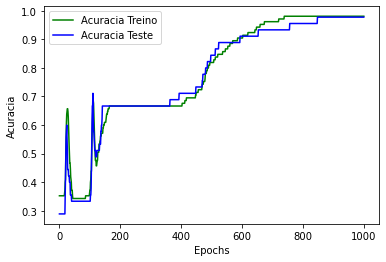

In [28]:
import matplotlib.pyplot as plt
acuraciatreino=historico.history['acc']
acuraciateste=historico.history['val_acc']
epocas=range(1,len(acuraciateste)+1) #+1 para começar do 1 e nao do 0
plt.plot(epocas, acuraciatreino, '-g', label='Acuracia Treino')
plt.plot(epocas, acuraciateste, '-b', label='Acuracia Teste')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Acuracia')